In [1]:
!pip install kaggle


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:11<00:00, 142MB/s]
100% 812M/812M [00:11<00:00, 74.9MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile
data='dogs-vs-cats.zip'
with ZipFile(data,'r') as zip:
  zip.extractall()
  print("Everything is extracted")

Everything is extracted


In [7]:
data='train.zip'
with ZipFile(data,'r') as zip:
  zip.extractall()
  print("Everything is extracted")

Everything is extracted


In [9]:
import os
path,dirs,file=next(os.walk('/content/train'))
print(len(file)," is the total coutn")

25000  is the total coutn


In [10]:
file_name=os.listdir("/content/train")
print(file_name)

['cat.9610.jpg', 'dog.4920.jpg', 'cat.1714.jpg', 'cat.8778.jpg', 'cat.11527.jpg', 'dog.7766.jpg', 'cat.10723.jpg', 'cat.12337.jpg', 'dog.9811.jpg', 'dog.1305.jpg', 'cat.7294.jpg', 'cat.3854.jpg', 'dog.8325.jpg', 'dog.10950.jpg', 'cat.2963.jpg', 'dog.5098.jpg', 'dog.5209.jpg', 'cat.3886.jpg', 'cat.3138.jpg', 'cat.2153.jpg', 'cat.8392.jpg', 'cat.3707.jpg', 'cat.12255.jpg', 'cat.6634.jpg', 'cat.1382.jpg', 'cat.7054.jpg', 'cat.6276.jpg', 'dog.3878.jpg', 'cat.5395.jpg', 'dog.2622.jpg', 'cat.1728.jpg', 'dog.4401.jpg', 'cat.2972.jpg', 'cat.6849.jpg', 'cat.2373.jpg', 'dog.4805.jpg', 'cat.3641.jpg', 'dog.5188.jpg', 'cat.1617.jpg', 'dog.5849.jpg', 'cat.2595.jpg', 'dog.6700.jpg', 'dog.4049.jpg', 'cat.1064.jpg', 'cat.1701.jpg', 'cat.11896.jpg', 'cat.7099.jpg', 'dog.7806.jpg', 'cat.8314.jpg', 'cat.4106.jpg', 'dog.4087.jpg', 'dog.5695.jpg', 'cat.2102.jpg', 'cat.11778.jpg', 'dog.6025.jpg', 'dog.10687.jpg', 'cat.8426.jpg', 'cat.4008.jpg', 'cat.9229.jpg', 'dog.5680.jpg', 'dog.1212.jpg', 'cat.8434.jpg',

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

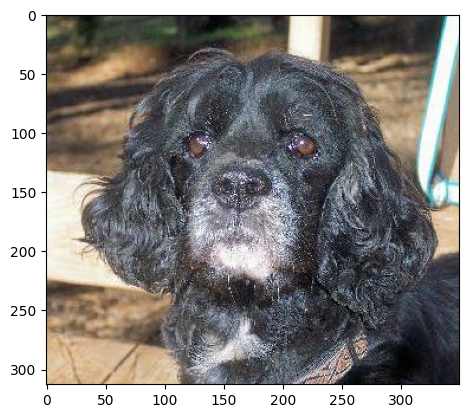

In [12]:
img=mpimg.imread('/content/train/dog.7766.jpg')
img_plt = plt.imshow(img)
plt.imshow(img)

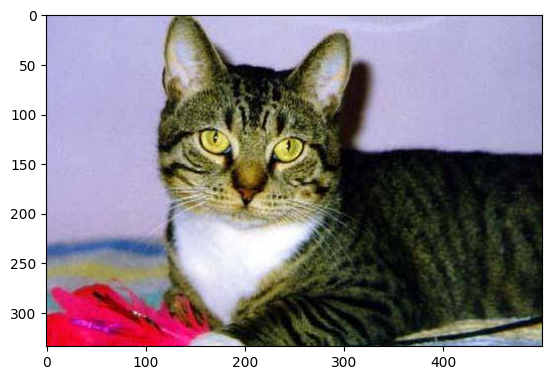

In [13]:
img=mpimg.imread('/content/train/cat.11527.jpg')
img_plt = plt.imshow(img)
plt.imshow(img)

In [15]:
file_name=os.listdir("/content/train")
for i in range(5):
  name=file_name[i]
  print(name[0:3])

cat
dog
cat
cat
cat


In [18]:

file_name=os.listdir("/content/train")
dog_count=0
cat_count=0
for file_image in file_name:

  name=file_image[0:3]
  if name=="dog":
    dog_count+=1;
  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [20]:
os.mkdir('/content/image resized')

In [24]:
original_folder='/content/train/'
resized_foler='/content/image resized/'
for i in range(2000):
  file_name=os.listdir('/content/train/')[i]
  img_path=original_folder+file_name
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert("RGB")
  New_path=resized_foler+file_name
  img.save(New_path)

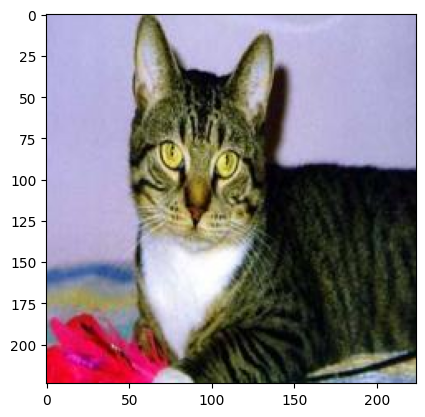

In [26]:
img=mpimg.imread('/content/image resized/cat.11527.jpg')
img_plt = plt.imshow(img)
plt.imshow(img)

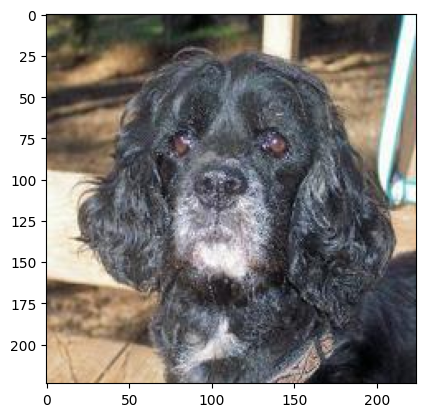

In [27]:
img=mpimg.imread('/content/image resized/dog.7766.jpg')
img_plt = plt.imshow(img)
plt.imshow(img)

In [34]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [39]:
print(file_names[0:5])
print(labels[0:5])
print(len(file_names))

['cat.9610.jpg', 'dog.4920.jpg', 'cat.1714.jpg', 'cat.8778.jpg', 'cat.11527.jpg']
[0, 1, 0, 0, 0]
2000


In [40]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1006  994]


In [41]:
import cv2
import glob

In [42]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [43]:
print(dog_cat_images)

[[[[129 158 179]
   [132 161 182]
   [137 166 187]
   ...
   [100  98  97]
   [ 95  93  92]
   [ 92  90  89]]

  [[128 157 178]
   [131 160 181]
   [135 164 185]
   ...
   [103 101 100]
   [ 99  97  96]
   [ 96  94  93]]

  [[131 160 181]
   [133 162 183]
   [135 164 185]
   ...
   [102 103 101]
   [100 101  99]
   [ 98  99  97]]

  ...

  [[ 59  83 105]
   [ 62  86 108]
   [ 63  90 111]
   ...
   [  1  17  24]
   [  0  16  23]
   [  0  15  22]]

  [[ 64  88 110]
   [ 65  89 111]
   [ 65  91 115]
   ...
   [  1  17  24]
   [  0  15  24]
   [  0  15  24]]

  [[ 69  93 115]
   [ 68  92 114]
   [ 65  91 115]
   ...
   [  2  18  25]
   [  0  16  25]
   [  0  15  24]]]


 [[[ 80  78  77]
   [ 87  85  84]
   [ 83  79  78]
   ...
   [209 177 142]
   [212 177 137]
   [209 174 131]]

  [[ 77  75  74]
   [ 84  82  81]
   [ 81  77  76]
   ...
   [205 173 138]
   [209 174 134]
   [208 173 130]]

  [[ 72  70  69]
   [ 80  78  77]
   [ 79  75  74]
   ...
   [200 170 135]
   [207 174 135]
   [209 174

In [44]:
type(dog_cat_images)

numpy.ndarray

In [45]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [47]:
X = dog_cat_images
Y = np.asarray(labels)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [52]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [53]:
print(X_train_scaled)

[[[[0.25882353 0.19215686 0.14117647]
   [0.30196078 0.23529412 0.18431373]
   [0.42352941 0.35686275 0.30588235]
   ...
   [0.27058824 0.26666667 0.25098039]
   [0.15686275 0.15294118 0.1372549 ]
   [0.10588235 0.10196078 0.08627451]]

  [[0.40392157 0.3372549  0.28627451]
   [0.25490196 0.18823529 0.1372549 ]
   [0.20784314 0.14117647 0.09019608]
   ...
   [0.14509804 0.14117647 0.1254902 ]
   [0.09803922 0.09411765 0.07843137]
   [0.12156863 0.11764706 0.10196078]]

  [[0.34117647 0.2745098  0.22352941]
   [0.35294118 0.28627451 0.23529412]
   [0.29411765 0.22745098 0.17647059]
   ...
   [0.07058824 0.0627451  0.05882353]
   [0.07058824 0.0627451  0.05882353]
   [0.14117647 0.13333333 0.12941176]]

  ...

  [[0.59215686 0.55294118 0.48627451]
   [0.65490196 0.62352941 0.55686275]
   [0.63921569 0.61960784 0.56078431]
   ...
   [0.7372549  0.59215686 0.51372549]
   [0.76862745 0.56078431 0.47843137]
   [0.66666667 0.43137255 0.34509804]]

  [[0.56078431 0.51372549 0.44313725]
   [0.6

In [54]:
import tensorflow as tf
import tensorflow_hub as hub

In [55]:
# mobile_net_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
# pretrained_model=hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

In [67]:
import tensorflow as tf
import tensorflow_hub as hub

num_of_classes = 2

# ✅ Wrapper to make hub.KerasLayer acceptable to Sequential
class WrappedHubLayer(tf.keras.layers.Layer):
    def __init__(self, hub_url, input_shape):
        super(WrappedHubLayer, self).__init__()
        self.hub_layer = hub.KerasLayer(hub_url, input_shape=input_shape, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)

# Use wrapped layer in Sequential
model = tf.keras.Sequential([
    WrappedHubLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/5", input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])


In [68]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [70]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ wrapped_hub_layer_1             │ ?                      │   0 (unbuilt) │
│ (WrappedHubLayer)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - acc: 0.8205 - loss: 0.3479
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 976ms/step - acc: 0.9872 - loss: 0.0424
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 996ms/step - acc: 0.9904 - loss: 0.0396
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 990ms/step - acc: 0.9892 - loss: 0.0305
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 991ms/step - acc: 0.9949 - loss: 0.0223


Path of the image to be predicted: /content/train/dog.7766.jpg


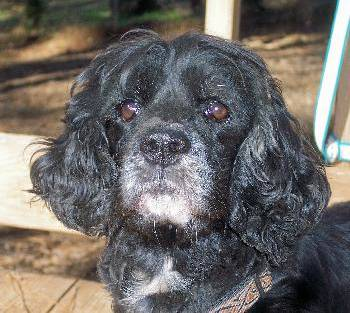

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
[[0.00157129 0.99842864]]
1
The image represents a Dog


In [72]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')